In [220]:
"""
    (Successful) Attempt for the controlled version:
"""
import numpy as np
import qiskit
from qiskit.quantum_info import state_fidelity
from numpy import linalg as LA
import qib
import matplotlib.pyplot as plt
import scipy
import h5py

import sys
sys.path.append("../../src/brickwall_sparse")
from utils_sparse import construct_ising_local_term, reduce_list, X, I2, get_perms
from ansatz_sparse import ansatz_sparse
import rqcopt as oc
from scipy.sparse.linalg import expm_multiply
from qiskit.quantum_info import random_statevector
from optimize_sparse import optimize

Vlists_2, Vlists_3, Vlists_4, Vlists_5, Vlists_6, Vlists_9 = ([], [], [], [], [], [])
errs_2, errs_3, errs_4, errs_5, errs_6, errs_9 = ([], [], [], [], [], [])
t_errs2, t_errs3, t_errs6, t_errs9 = ([], [], [], [])
L = 6
ts = list(np.logspace(-10, 1, num=40))

for t in ts:
    latt = qib.lattice.IntegerLattice((L, ), pbc=True)
    field = qib.field.Field(qib.field.ParticleType.QUBIT, latt)
    J, h, g = (1, 0, 3)
    hamil = qib.IsingHamiltonian(field, J, h, g).as_matrix()
    
    X = np.array([[0, 1], [1, 0]])
    Z = np.array([[1, 0], [0, -1]])
    Y = np.array([[0, -1j], [1j, 0]])
    I2 = np.array([[1, 0], [0, 1]])
    
    hloc = construct_ising_local_term(J, 0, 0, ndim=2) + g*(np.kron(X, I2)+np.kron(I2, X))/2
    V1 = scipy.linalg.expm(-1j*t*hloc)
    V2 = scipy.linalg.expm(-1j*t*hloc)
    Vlist_reduced_2 = [V1, V2]
    perms_2 = [[[i for i in range(L)]] if i%2==0 else [[i for i in range(1, L)]+[0]] for i in range(len(Vlist_reduced_2))]
    
    hloc = construct_ising_local_term(J, 0, 0, ndim=2) + g*(np.kron(X, I2)+np.kron(I2, X))/2
    V1 = scipy.linalg.expm(-1j*t*hloc/2)
    V2 = scipy.linalg.expm(-1j*t*hloc)
    Vlist_reduced_3 = [V1, V2, V1]
    perms_3 = [[[i for i in range(L)]] if i%2==0 else [[i for i in range(1, L)]+[0]] for i in range(len(Vlist_reduced_3))]
    
    hloc = construct_ising_local_term(J, 0, 0, ndim=2) + g*(np.kron(X, I2)+np.kron(I2, X))/2
    V1 = scipy.linalg.expm(-1j*t*hloc/4)
    V2 = scipy.linalg.expm(-1j*t*hloc/2)
    Vlist_reduced_5 = [V1, V2, V2, V2, V1]
    perms_5 = [[[i for i in range(L)]] if i%2==0 else [[i for i in range(1, L)]+[0]] for i in range(len(Vlist_reduced_5))]
    
    hloc = construct_ising_local_term(J, 0, 0, ndim=2) + g*(np.kron(X, I2)+np.kron(I2, X))/2
    V1 = scipy.linalg.expm(-1j*t*hloc/2)
    V2 = scipy.linalg.expm(-1j*t*hloc/2)
    Vlist_reduced_4 = [V1, V2]*2
    perms_4 = [[[i for i in range(L)]] if i%2==0 else [[i for i in range(1, L)]+[0]] for i in range(len(Vlist_reduced_4))]
    
    V1 = scipy.linalg.expm(-1j*t*hloc/4)
    V2 = scipy.linalg.expm(-1j*t*hloc/2)
    Vlist_reduced_6 = [V1, V2, V1]*2
    perms_6 = [[[i for i in range(L)]] if i%2==0 else [[i for i in range(1, L)]+[0]] for i in range(len(Vlist_reduced_6))]
    

    state = random_statevector(2**L).data
    t_errs3.append(np.linalg.norm(ansatz_sparse(Vlist_reduced_3, L, perms_3, state) - expm_multiply(
        -1j * t * hamil, state), ord=2))
    niter = 30
    rS    = 5
    
    Vlist, f_iter, err_iter = optimize(L, hamil, t, Vlist_reduced_2, perms_2, rS=rS, niter=niter)
    errs_2.append(err_iter[-1])
    Vlists_2.append(Vlist)
    
    Vlist, f_iter, err_iter = optimize(L, hamil, t, Vlist_reduced_3, perms_3, rS=rS, niter=niter)
    errs_3.append(err_iter[-1])
    Vlists_3.append(Vlist)
    
    Vlist, f_iter, err_iter = optimize(L, hamil, t, Vlist_reduced_5, perms_5, rS=rS, niter=niter)
    errs_5.append(err_iter[-1])
    Vlists_5.append(Vlist)
    
    """t_errs6.append(np.linalg.norm(ansatz_sparse(Vlist_reduced_6, L, perms_6, state) - expm_multiply(
        -1j * t * hamil, state), ord=2))
    Vlist, f_iter, err_iter = optimize(L, hamil, t, Vlist_reduced_6, perms_6, rS=rS, niter=niter)
    errs_6.append(err_iter[-1])
    Vlists_6.append(Vlist)"""
    
    """t_errs9.append(np.linalg.norm(ansatz_sparse(Vlist_reduced_9, L, perms_9, state) - expm_multiply(
        -1j * t * hamil, state), ord=2))
    Vlist, f_iter, err_iter = optimize(L, hamil, t, Vlist_reduced_9, perms_9, rS=rS, niter=niter)
    errs_9.append(err_iter[-1])
    Vlists_9.append(Vlist)"""

Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  5.974749086826701e-16
Current erro

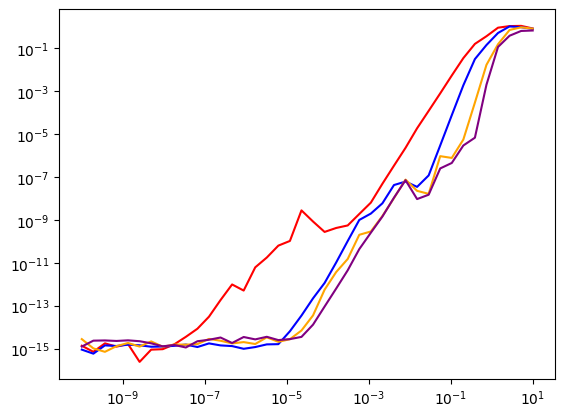

In [482]:
plt.plot(ts, errs_2, color='red')
#plt.plot(ts, t_errsL6_3, color='blue', ls='--')
plt.plot(ts, errs_3, color='blue')
plt.plot(ts, errs_5, color='orange')
#plt.plot(ts, errs_2, color='red')
plt.plot(ts, errs_6, color='purple')
#plt.plot(ts, errs_9, color='pink')



plt.yscale('log')
plt.xscale('log')
#plt.xlim([1e-6, 1.5])

In [584]:
import numpy as np

def random_unitary(n=4):
    """
    Generate a random n x n unitary matrix using QR decomposition.
    Default is 4x4.
    """
    # Random complex Gaussian matrix
    Z = (np.random.randn(n, n) + 1j * np.random.randn(n, n)) / np.sqrt(2)
    
    # QR decomposition
    Q, R = np.linalg.qr(Z)
    
    # Normalize phases to ensure unitarity
    D = np.diag(R)
    L = np.diag(D / np.abs(D))
    
    return Q @ L

In [ ]:
L = 4
rs = 10

latt = qib.lattice.IntegerLattice((L, ), pbc=True)
field = qib.field.Field(qib.field.ParticleType.QUBIT, latt)
J, h, g = (1, 0, 3)
hamil = qib.IsingHamiltonian(field, J, h, g).as_matrix()

    
hloc = construct_ising_local_term(J, 0, 0, ndim=2) + g*(np.kron(X, I2)+np.kron(I2, X))/2
V2 = scipy.linalg.expm(-1j*t*hloc)
Vlist_reduced_2 = [V2, V2]
perms_2 = [[[i for i in range(L)]] if i%2==0 else [[i for i in range(1, L)]+[0]] for i in range(len(Vlist_reduced_2))]
    
hloc = construct_ising_local_term(J, 0, 0, ndim=2) + g*(np.kron(X, I2)+np.kron(I2, X))/2
V1 = scipy.linalg.expm(-1j*t*hloc/2)
V2 = scipy.linalg.expm(-1j*t*hloc)
    Vlist_reduced_3 = [V1, V2, V1]
perms_3 = [[[i for i in range(L)]] if i%2==0 else [[i for i in range(1, L)]+[0]] for i in range(len(Vlist_reduced_3))]
    
V1 = scipy.linalg.expm(-1j*t*hloc/4)
V2 = scipy.linalg.expm(-1j*t*hloc/2)
Vlist_reduced_6 = [V1, V2, V1]*2
perms_6 = [[[i for i in range(L)]] if i%2==0 else [[i for i in range(1, L)]+[0]] for i in range(len(Vlist_reduced_6))]
    
V1 = scipy.linalg.expm(-1j*t*hloc/6)
V2 = scipy.linalg.expm(-1j*t*hloc/3)
Vlist_reduced_9 = [V1, V2, V1]*3
perms_9 = [[[i for i in range(L)]] if i%2==0 else [[i for i in range(1, L)]+[0]] for i in range(len(Vlist_reduced_9))]
    
V1 = scipy.linalg.expm(-1j*t*hloc/8)
V2 = scipy.linalg.expm(-1j*t*hloc/4)
Vlist_reduced_12 = [V1, V2, V1]*4
perms_12 = [[[i for i in range(L)]] if i%2==0 else [[i for i in range(1, L)]+[0]] for i in range(len(Vlist_reduced_12))]
    
V1 = scipy.linalg.expm(-1j*t*hloc/10)
V2 = scipy.linalg.expm(-1j*t*hloc/5)
Vlist_reduced_15 = [V1, V2, V1]*5
perms_15 = [[[i for i in range(L)]] if i%2==0 else [[i for i in range(1, L)]+[0]] for i in range(len(Vlist_reduced_15))]

In [957]:
errs_2_L6 = []
errs_3_L6 = []
for t in [100]:
    Vlist, f_iter, err_iter = optimize(L, hamil, t, Vlist_reduced_2, perms_2, rS=rS, niter=20)
    errs_2_L6.append(err_iter[-1])
    Vlist, f_iter, err_iter = optimize(L, hamil, t, Vlist_reduced_3, perms_3, rS=rS, niter=50)
    errs_3_L6.append(err_iter[-1])

Current error:  0.7423657890768046
Current error:  0.7388075546935855
Current error:  0.7319058614337485
Current error:  0.7189731654174464
Current error:  0.696622988959109
Current error:  0.6748286791247085
Current error:  0.6585903147431709
Current error:  0.6465178959929025
Current error:  0.6378608291220156
Current error:  0.6324955214164681
Current error:  0.6303059592877329
Current error:  0.6302869832102534
Current error:  0.6302919471739796
Current error:  0.6302896525413179
Current error:  0.6302896525413179
Current error:  0.6302896525413179
Current error:  0.6302896525413179
Current error:  0.6302896525413179
Current error:  0.6302896525413179
Current error:  0.6302896525413179
Current error:  0.6302896525413179
Current error:  0.772545593697036
Current error:  0.7678168969711131
Current error:  0.7585199162056551
Current error:  0.7405993726925673
Current error:  0.7076913423177056
Current error:  0.6725601798959736
Current error:  0.6444633239464526
Current error:  0.6232

In [963]:
errs_6_L6 = [1.865414376582774e-09]
for t in [100]:
    Vlist6, f_iter, err_iter = optimize(L, hamil, t, Vlist_reduced_6, perms_6, rS=rS, niter=200)
    errs_6_L6.append(err_iter[-1])

Current error:  0.6520710707747777
Current error:  0.6470465550245288
Current error:  0.6373834765727308
Current error:  0.6196430488712367
Current error:  0.590648988831137
Current error:  0.5648310696171144
Current error:  0.5438602795610188
Current error:  0.5229386471206479
Current error:  0.5080213953026772
Current error:  0.4837884336092316
Current error:  0.468073901913422
Current error:  0.446038703837213
Current error:  0.4314413018354647
Current error:  0.41531729666894635
Current error:  0.4046627769788488
Current error:  0.39588197326090296
Current error:  0.39103717910780744
Current error:  0.3826408056153701
Current error:  0.3783232342139701
Current error:  0.3699808914496342
Current error:  0.3645097316137765
Current error:  0.35614422848869004
Current error:  0.3494721559272441
Current error:  0.3411470307785799
Current error:  0.3343011181526895
Current error:  0.3260610163123211
Current error:  0.31946458371739384
Current error:  0.31141629209115923
Current error:  0

In [964]:
errs_9_L6 = []    
for t in [100]:
    Vlist9, f_iter, err_iter = optimize(L, hamil, t, Vlist_reduced_9, perms_9, rS=rS, niter=niter)
    errs_9_L6.append(err_iter[-1])

Current error:  1.0375127274753315
Current error:  1.0298132712424661
Current error:  1.0144417602278257
Current error:  0.9838447537253467
Current error:  0.9235279348697908
Current error:  0.8504801523299829
Current error:  0.7812952450349804
Current error:  0.7172025708535344
Current error:  0.6587897306743816
Current error:  0.6058100870001965
Current error:  0.55724489806491
Current error:  0.5117802433301254
Current error:  0.4683681912356182
Current error:  0.4265942634446411
Current error:  0.3866656485905814
Current error:  0.355647895638673
Current error:  0.31781858049794387
Current error:  0.29018462570892645
Current error:  0.26233617614666255
Current error:  0.24174476129143868
Current error:  0.22164277130202353
Current error:  0.20731437599139696
Current error:  0.1882641797769634
Current error:  0.17347802791286396
Current error:  0.15811653089974947
Current error:  0.1462197211745217
Current error:  0.13691835578265563
Current error:  0.1304186959828733
Current error:

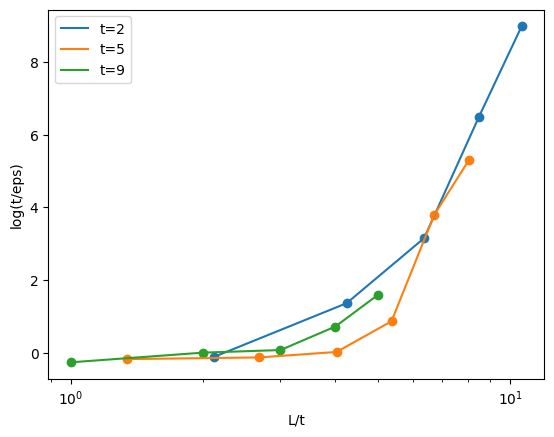

In [1043]:
results = {
    2: ([3, 6, 9, 12, 15], [1.12442141211293, 0.257, 0.04293401947, 0.0015131833419, 0.000125662500]),
    5: ([3, 6, 9, 12, 15, 18], [1.199403225261, 1.14441513169386, 0.9843032424228404, 0.422910147004, 0.02272763, 0.0049861351593332]),
    9: ([3, 6, 9, 12, 15], [1.3095708825792, 1.002850703973, 0.9341866092, 0.488630415364, 0.20395637357816]),
}


for t in results.keys():
    Ls, eps = results[t]
    plt.plot([L/t**0.5 for L in Ls], [np.log(1/e) for e in eps], label='t='+str(t))
    plt.scatter([L/t**0.5 for L in Ls], [np.log(1/e) for e in eps])
plt.xlabel("L/t")
plt.ylabel("log(t/eps)")
plt.xscale('log')
plt.legend()

In [1837]:
niters = {4: 50, 6: 70, 8: 150, 10: 7}

for L in [10]:
    nlayers = np.min([int(np.ceil(2*L/3)*3), 15])
    nlayers = 24
    print('nlayers', nlayers)
    niter = niters[L]
    rS=1
    for t in [5]:
        print('t: ', t)
        latt = qib.lattice.IntegerLattice((L, ), pbc=True)
        field = qib.field.Field(qib.field.ParticleType.QUBIT, latt)
        J, h, g = (1, 0, 3)
        hamil = qib.IsingHamiltonian(field, J, h, g).as_matrix()
    
        hloc = construct_ising_local_term(J, 0, 0, ndim=2) + g*(np.kron(X, I2)+np.kron(I2, X))/2
        V1 = scipy.linalg.expm(-1j*t*hloc/(2*nlayers/3))
        V2 = scipy.linalg.expm(-1j*t*hloc/(nlayers/3))
        Vlist_reduced = [V1, V2, V1] * int(nlayers//3)
        perms = [[[i for i in range(L)]] if i%2==0 else [[i for i in range(1, L)]+[0]] for i in range(len(Vlist_reduced))]
    
        Vlist, f_iter, err_iter = optimize(L, hamil, t, Vlist_reduced, perms, rS=rS, log=True, niter=niter)
        with h5py.File(f"./results/L{L}_t{t}_layers{nlayers}.hdf5", "w") as f:
            f.create_dataset("Vlist", data=Vlist)

nlayers 24
t:  5
Current error:  1.204249984050381
Current error:  1.18888906975518
Current error:  1.1561792921343523
Current error:  1.083206490972462
Current error:  0.913926922220859
Current error:  0.6942808965547594
Current error:  0.5182943205868233
Current error:  0.4039056821749234


In [1838]:
L_eval = 12

#errs = {}
for L_train in [10]:
    errs[L_train] = []

    ts = np.linspace(0.5, 5, 10) if L_train not in [10] else [3.5, 4.25, 4.5, 5]
    
    for t in ts:
        nlayers = np.min([int(np.ceil(2*L_train/3)*3), 15]) if L_train not in [10] else (18 if t not in [4.5, 4.5, 5] else 24)
        with h5py.File(f"./results/L{L_train}_t{t}_layers{nlayers}.hdf5", "r") as f:
            Vlist =  f["Vlist"][:]
                        
        latt = qib.lattice.IntegerLattice((L_eval, ), pbc=True)
        field = qib.field.Field(qib.field.ParticleType.QUBIT, latt)
        J, h, g = (1, 0, 3)
        hamil = qib.IsingHamiltonian(field, J, h, g).as_matrix()
                        
        perms_extended = [[[i for i in range(L_eval)]] if i%2==0 else [[i for i in range(1, L_eval)]+[0]] for i in range(len(Vlist))]
        state = random_statevector(2**L_eval).data
        errs[L_train].append(1-state_fidelity(ansatz_sparse(Vlist, L_eval, perms_extended, state), expm_multiply(
                -1j * t * hamil, state)) )


/tmp/ipykernel_26296/1255966572.py:74: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


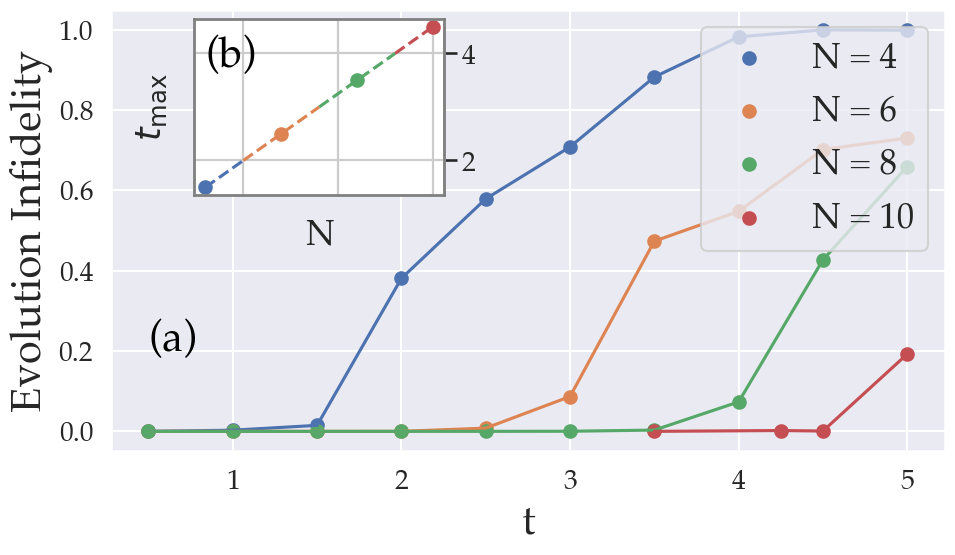

In [2035]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import seaborn as sns
from matplotlib.pyplot import figure

L_evals = [4, 6, 8, 10]
sns.set_theme(
    style="darkgrid",  # 'darkgrid', 'white', 'ticks'
    context="talk",     # 'paper', 'talk', 'poster'
    font_scale=1.2,
    font="Palatino"
)
#sns.set()

palette = sns.color_palette("deep")
plt.figure(figsize=(10, 6))


for L_train in [4, 6, 8, 10]: 
    plt.plot(np.linspace(0.5, 5, 10) if L_train not in [10] else [3.5, 4.25, 4.5, 5],
             errs[L_train])
    plt.scatter(np.linspace(0.5, 5, 10) if L_train not in [10] else [3.5, 4.25, 4.5, 5],
             errs[L_train], label=f'N = {L_train}')
plt.ylabel('Evolution Infidelity', size=30)
plt.xlabel('t', size=30)
plt.annotate('(a)', (0.5, 0.2), color='black', size=30)
plt.legend(loc='upper right', prop={'size': 25})


# === Inset axes ===
with sns.axes_style("whitegrid"): 
    sns.set_theme(
        style="whitegrid",  # 'darkgrid', 'white', 'ticks'
        context="talk",     # 'paper', 'talk', 'poster'
        font_scale=1.2,
        font="Palatino"
    )
    
    ax_inset = inset_axes(
        plt.gca(),
        width="30%", height="40%",
        loc="upper left",
        bbox_to_anchor=(0.1, -0.02, 1, 1),  # (x0, y0, width, height)
        bbox_transform=plt.gca().transAxes,
        borderpad=0
    )
    #sns.despine(ax=ax_inset)
    #pos = ax_inset.get_position()  # [x0, y0, width, height] in figure coords
    #ax_inset.set_position([pos.x0 + 0.05, pos.y0 + 0.05, pos.width, pos.height])

    times = [1.5, 2.5, 3.5, 4.5]
    for i, time in enumerate(times):
        ax_inset.scatter(L_evals[i], [time], color=palette[i])
    ax_inset.plot([4, 5] , [1.5, 2], color=palette[0], ls='--')
    ax_inset.plot([5, 7] , [2, 3], color=palette[1], ls='--')
    ax_inset.plot([7, 9],  [3, 4], color=palette[2], ls='--')
    ax_inset.plot([9, 10], [4, 4.5], color=palette[3], ls='--')
    
    ax_inset.set_xlabel('N', size=25)
    ax_inset.set_ylabel(r'$t_{\text{max}}$', size=25)
    ax_inset.set_xticklabels([])
    ax_inset.set_yticklabels([])
    plt.annotate('(b)', (4, 3.75), color='black', size=30)
    
    # Create a second y-axis
    y2 = ax_inset.twinx()
    y2.set_ylim(ax_inset.get_ylim())
    #y2.set_yticks([0.2, 0.4, 0.6])
    
    for side in ["top", "right", "bottom", "left"]:
        ax_inset.spines[side].set_visible(True)   # force all spines on
        ax_inset.spines[side].set_edgecolor("gray")
        ax_inset.spines[side].set_linewidth(2)

plt.tight_layout()

plt.savefig('../figs/A1_fig2.pdf')
plt.savefig('../figs/A1_fig2.png')

In [1613]:
"""
    Test operations.
"""
sizes = [12]

#Ls1 = [2, 3, 6, 9, 12, 15]
Ls1 = []
Ls2 = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15]
Ls3 = [2, 3, 6, 9, 12, 15]
ts1 = []
#ts1 = [0.2, 0.25, 0.3]
ts2 = [.5, .6]
ts3  = [.0.9]
Ls_ext = (Ls1, Ls2, Ls3)
ts_ext = (ts1, ts2, ts3)

results_L = {}
results_dict_L = {}

for L in sizes:
    results = []
    results_dict = {}
    for _ in range(3):
        Ls = Ls_ext[_]
        ts = ts_ext[_]

        for t in ts:
            results.append(([], [], []))
            results_dict[t] = ([], [])
            for layer in Ls:
                with h5py.File(f"./results/t{t}_layers{layer}.hdf5", "r") as f:
                    Vlist =  f["Vlist"][:]
                
                latt = qib.lattice.IntegerLattice((L, ), pbc=True)
                field = qib.field.Field(qib.field.ParticleType.QUBIT, latt)
                J, h, g = (1, 0, 3)
                hamil = qib.IsingHamiltonian(field, J, h, g).as_matrix()
                
                perms_extended = [[[i for i in range(L)]] if i%2==0 else [[i for i in range(1, L)]+[0]] for i in range(len(Vlist))]
                state = random_statevector(2**L).data
                print(1-state_fidelity(ansatz_sparse(Vlist, L, perms_extended, state), expm_multiply(
                    -1j * t * hamil, state)) )
                
                results[-1][0].append(layer)
                results[-1][1].append(1-state_fidelity(ansatz_sparse(Vlist, L, perms_extended, state), expm_multiply(
                    -1j * t * hamil, state))) 
                results[-1][2].append(t) 
        
                results_dict[t][0].append(layer)
                results_dict[t][1].append(1-state_fidelity(ansatz_sparse(Vlist, L, perms_extended, state), expm_multiply(
                    -1j * t * hamil, state)))
    results_L[L] = results
    results_dict_L[L] = results_dict

0.10702009390277412
0.010065428548493238
0.0002777656125156902
4.097544979986267e-06
8.754490687934435e-09
1.4957213245736511e-10
5.749622999928761e-12
1.447224562411975e-10
1.829425499977333e-11
1.5264678410176202e-11
1.2662315640454835e-11
3.97415433894821e-12
0.15504296345894442
0.021185508380965112
0.002532889085876233
3.732830338265547e-05
2.2305545543943595e-07
4.476938819664156e-10
6.155609355573688e-11
9.430920488995298e-10
1.4003020964992174e-11
6.6133765130871325e-12
4.374589579470012e-11
7.438494264988549e-12
0.2675140841822168
0.040412894711865266
9.459513861442836e-06
2.9970068649021187e-09
5.721090268195894e-10
1.1468292981930972e-10
0.45357683400851745
0.06341493668481546
0.00024553067013144414
1.4678581905513965e-08
1.3444720892152873e-09
6.038585187440049e-10


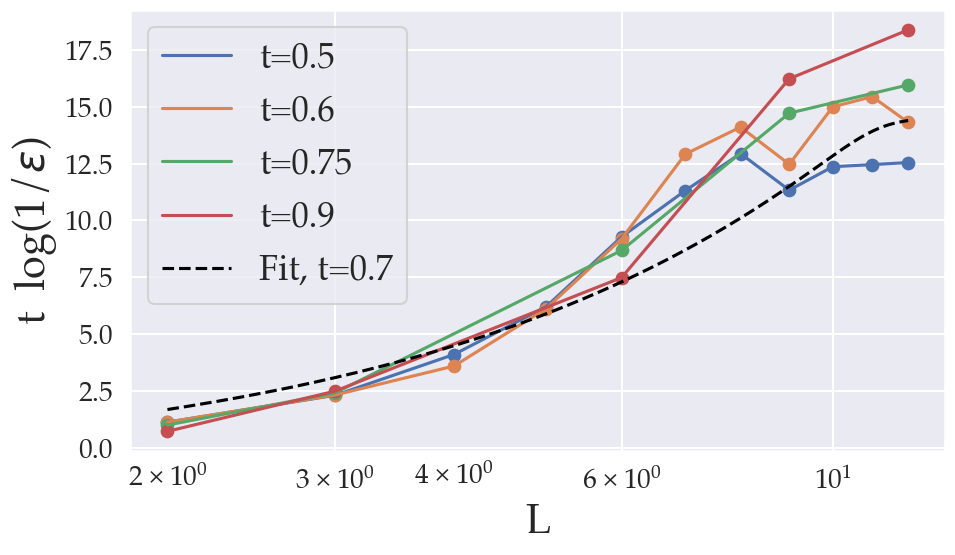

In [2036]:
sns.set_theme(
    style="darkgrid",  # 'darkgrid', 'white', 'ticks'
    context="talk",     # 'paper', 'talk', 'poster'
    font_scale=1.2,
    font="Palatino"
)
palette = sns.color_palette("deep")
plt.figure(figsize=(10, 6))

for L in [12]:
    for _ in range(3):
        Ls = Ls_ext[_]
        ts = ts_ext[_]

        results_dict = results_dict_L[L]
        for i, t in enumerate(ts):
            Ls, eps = results_dict[t]
            plt.plot([L for L in Ls][:-1], [np.log(1/e)*t for e in eps][:-1], label='t='+str(t) if L==12 else '', ls='--' if L==16 else '-')
            plt.scatter([L for L in Ls][:-1], [np.log(1/e)*t for e in eps][:-1], s=70)


def fit2(L, t, c0, c1, c2, c3, c4, eps_floor):
    return (c3**(c0*t**c4)*np.exp(c2-L))**(1/(c1+c0*t**c4)) - eps_floor

Ls_fit = np.linspace(2, 12, 200)
eps_fit_1 = []
for L in Ls_fit:
    eps_fit_1.append(fit2(L, 0.7, popt[0], popt[1], popt[2], popt[3], popt[4], -1e-9))
eps_fit_2 = []
for L in Ls_fit:
    eps_fit_2.append(fit2(L, 0.75, popt[0], popt[1], popt[2], popt[3], popt[4], -1e-2))
plt.plot([L for L in Ls_fit], [0.7*np.log(1/e) for e in eps_fit_1], color='black', ls='--', label='Fit, t=0.7')
#plt.plot([L/.75 for L in Ls_fit], [np.log(1/e) for e in eps_fit_2], color='red', ls='--', label='Fit, t=0.75')

plt.xlabel("L", size=30)
plt.ylabel(r"t  log(1/$\epsilon$)", size=30)
#plt.yscale('log')
plt.xscale('log')
plt.legend(prop={'size': 25})
plt.xticks([3, 6, 10])
plt.tight_layout()

plt.savefig('../figs/A1_fig1.pdf')
plt.savefig('../figs/A1_fig1.png')

In [1547]:
"""
    Test for fit!
"""
sizes = [12]
Ls = [2, 3, 6, 9, 12, 15]
ts = [0.2, 0.25, 0.3, .5, .6, 0.75, .9]

results_L_ = {}
for L in sizes:
    results_ = []
    for t in ts:
        results_.append(([], [], []))
        for layer in Ls:
            with h5py.File(f"./results/t{t}_layers{layer}.hdf5", "r") as f:
                Vlist =  f["Vlist"][:]
                    
            latt = qib.lattice.IntegerLattice((L, ), pbc=True)
            field = qib.field.Field(qib.field.ParticleType.QUBIT, latt)
            J, h, g = (1, 0, 3)
            hamil = qib.IsingHamiltonian(field, J, h, g).as_matrix()
                    
            perms_extended = [[[i for i in range(L)]] if i%2==0 else [[i for i in range(1, L)]+[0]] for i in range(len(Vlist))]
            state = random_statevector(2**L).data
            print(1-state_fidelity(ansatz_sparse(Vlist, L, perms_extended, state), expm_multiply(
                        -1j * t * hamil, state)) )
                    
            results_[-1][0].append(layer)
            results_[-1][1].append(1-state_fidelity(ansatz_sparse(Vlist, L, perms_extended, state), expm_multiply(
                        -1j * t * hamil, state))) 
            results_[-1][2].append(t) 
        

    results_L_[L] = results_

0.0023418160487282957
6.437069375753168e-06
1.3129497489217101e-11
7.243095012654521e-13
2.9976021664879227e-13
1.5232259897857148e-13
0.00724791745698361
5.080782610977774e-05
8.021605601982174e-11
2.5202062658991053e-13
9.987566329527908e-13
7.949196856316121e-14
0.017451343752266868
0.0002620623736372396
6.519558226614208e-10
4.1033842990145786e-13
1.1899370377932428e-12
1.6431300764452317e-14
0.10649399746417176
0.010290566239861687
9.125823652311738e-09
1.4967449502023555e-10
1.2050804798491299e-11
3.969047313034935e-12
0.15622984823993302
0.02139886865158236
2.322405575627684e-07
9.63957580424335e-10
4.61151117292502e-11
7.399414414521743e-12
0.2622021408898907
0.04187540906047804
9.649425798285982e-06
2.8810931418377095e-09
5.772911038093298e-10
1.1273337818806795e-10
0.46053703904268695
0.06492057907816617
0.00025573426032243773
1.5143758580471456e-08
1.3710415025514067e-09
6.045606237847778e-10


In [1550]:
from scipy.optimize import curve_fit


def fit1(X, c0, c1, c2, c3, c4, eps_floor):
    eps, t = X.T
    return c0 * t**c4 * np.log(c3/(eps+eps_floor)) + c1 * np.log(1/(eps+eps_floor)) + c2
    

ydata = []
for i in range(len(ts)):
    for L in Ls:
        ydata.append(L)
xdata = []
for i, t in enumerate(ts):
    for j, L in enumerate(Ls):
        xdata.append( (results[i][1][j], results[i][2][j]) )
xdata = np.array(xdata)

popt, pcov = curve_fit(fit1, xdata, ydata)
print('Opt params', popt)

yfit = fit1(xdata, *popt)
residuals = ydata - yfit
mse = np.mean(residuals**2)
rmse = np.sqrt(mse)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((ydata - np.mean(ydata))**2)
r2 = 1 - (ss_res / ss_tot)
r2

Opt params [ 1.92482941e-01  3.67456336e-01 -1.57069326e+00  8.01515792e+07
  1.08342356e+00 -1.63635402e-14]


/tmp/ipykernel_26296/4081765222.py:6: RuntimeWarning: invalid value encountered in log
  return c0 * t**c4 * np.log(c3/(eps+eps_floor)) + c1 * np.log(1/(eps+eps_floor)) + c2


0.8699015068087597

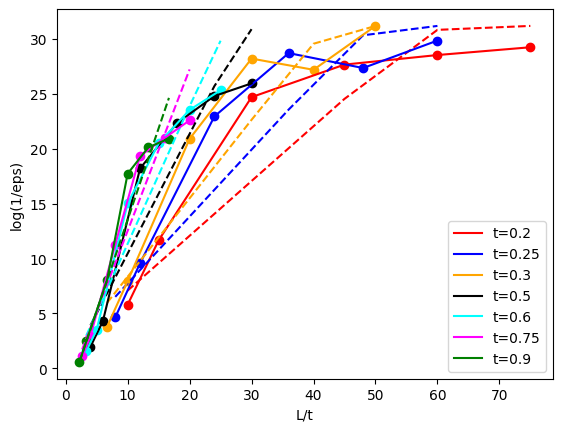

In [1353]:
def fit2(L, t, c0, c1, c2, c3, c4, eps_floor):
    return (c3**(c0*t**c4)*np.exp(c2-L))**(1/(c1+c0*t**c4)) - eps_floor

colors = ['red', 'blue', 'orange', 'black', 'cyan', 'magenta', 'green']
for i, t in enumerate(ts):
    Ls, eps = results_dict[t]
    plt.plot([L/t for L in Ls], [np.log(1/e) for e in eps], label='t='+str(t), color=colors[i])
    plt.scatter([L/t for L in Ls], [np.log(1/e) for e in eps], color=colors[i])

    #Ls, epss = results_dict[t]    
    #Ls_fit  = []
    #for e in epss:
    #    Ls_fit.append(fit1(np.array([[e, t]]), popt[0], popt[1],  popt[2],  popt[3],  popt[4], popt[5])[0])
    #plt.plot(Ls_fit, [np.log(1/e) for e in epss], ls='--', color=colors[i])
    epss = []
    for L in Ls:
        epss.append(fit2(L, t, *popt))
    plt.plot([L/t for L in Ls], [np.log(1/e) for e in epss], ls='--', color=colors[i])


plt.xlabel("L/t")
plt.ylabel("log(1/eps)")
#plt.xscale('log')
plt.legend()

In [1487]:
Vlists = {}
ts = np.linspace(0.51, 0.89, 30)
layers = [2, 3, 6]
for layer in layers:
    Vlists[layer] = {}
    for t in ts:
        with h5py.File(f"./results/results_layers{layer}.hdf5", "r") as f:
            Vlists[layer][t] =  f[f"Vlist{t}"][:]


sizes = [12]
results_L_cont_ts = {}
for size in sizes:
    results_cont_ts = {}
    for layer in layers:
        results_cont_ts[layer] = []
        for t in ts:
            Vlist = Vlists[layer][t]
            latt = qib.lattice.IntegerLattice((size, ), pbc=True)
            field = qib.field.Field(qib.field.ParticleType.QUBIT, latt)
            J, h, g = (1, 0, 3)
            hamil = qib.IsingHamiltonian(field, J, h, g).as_matrix()
            perms_extended = [[[i for i in range(size)]] if i%2==0 else [[i for i in range(1, size)]+[0]] for i in range(len(Vlist))]
            state = random_statevector(2**size).data
            #print(1-state_fidelity(ansatz_sparse(Vlist, L, perms_extended, state), expm_multiply(
            #    -1j * t * hamil, state)) )
            
            
            results_cont_ts[layer].append([t, 1-state_fidelity(ansatz_sparse(Vlist, size, perms_extended, state), expm_multiply(
                -1j * t * hamil, state))])
            
    results_L_cont_ts[size] = results_cont_ts

In [2386]:
def otimes(matrices):
	mat = np.eye(1)
	for matrix in matrices:
		mat = np.kron(mat, matrix)
	return mat


def swap_matrix(n, q1, q2):
	"""
	Creates a swap matrix for qubits q1 and q2 in an n-qubit system.
	"""

	dim = 2 ** n
	swap = np.eye(dim)
	for i in range(dim):
		binary = list(format(i, f'0{n}b'))  # Convert index to binary
		if binary[q1] != binary[q2]:  # Swap bits if different
			binary[q1], binary[q2] = binary[q2], binary[q1]
			j = int("".join(binary), 2)
			swap[i, i], swap[i, j] = 0, 1  # Swap rows in identity
	return swap
	

In [2456]:
anc = 3
Had = np.array([[1, 1], [1, -1]])/np.sqrt(2)
L = 4
ket_0 = np.array([[1],[0]])
ket_1 = np.array([[0],[1]])
rho_0_anc = ket_0 @ ket_0.T
rho_1_anc = ket_1 @ ket_1.T

#latt = qib.lattice.IntegerLattice((L, ), pbc=True)
#field = qib.field.Field(qib.field.ParticleType.QUBIT, latt)
#J, h, g = (1, 0, 3)
#hamil = qib.IsingHamiltonian(field, J, h, g).as_matrix().todense()
#eigenvalues, eigenvectors = np.linalg.eig(hamil)
#idx = eigenvalues.argsort()
#eigenvalues_sort = eigenvalues[idx]
#eigenvectors_sort = eigenvectors[:,idx]
#state = eigenvectors_sort[: , 1]
sv  = np.array([random_statevector(2**L).data]).T
hamil = -16*3 * sv @ sv.conj().T
#for i in range(2**L-1):
#    sv = random_statevector(2**L).data
#    hamil += (np.random.rand()+12) * sv  @ sv.conj().T
eigenvalues, eigenvectors = np.linalg.eig(hamil)
idx = eigenvalues.argsort()
eigenvalues_sort = eigenvalues[idx]
eigenvectors_sort = eigenvectors[:,idx]
state = eigenvectors_sort[: , 0]
state = np.array([state, ]).T
state = state / np.linalg.norm(state)
for i in range(anc):
    state = np.kron(np.array([[1], [1]])/np.sqrt(2), state)
state = np.squeeze(np.asarray(state))


QPE = np.eye(2**(L+anc))
for i, t in enumerate([0.0625, 0.125, 0.25]):
    cU = np.eye(2**(anc-1))
    cU = np.kron(cU, np.kron(rho_0_anc, np.eye(2**L)) + np.kron(rho_1_anc, scipy.linalg.expm(-1j*t*hamil)))
    cU = swap_matrix(L+anc, i, anc-1) @ cU @ swap_matrix(L+anc, i, anc-1)
    QPE = cU @ QPE

In [2457]:
import numpy as np
import itertools

def QFT_matrix(n):
    N = 2**n
    omega = np.exp(1j * 2*np.pi / N)
    return (1/np.sqrt(N)) * np.array([[omega**(j*k) for k in range(N)] for j in range(N)])
def QFT_dagger(n):
    return QFT_matrix(n).conj().T

anc = 3
t_list = np.array([2**-4, 2**-3, 2**-2])
min_t = t_list.min()
# ---- build permutation from computational index -> weighted integer index ----
Nanc = 2**anc
perm_indices = np.zeros(Nanc, dtype=int)  # perm_indices[y] = int_index(y)
for y in range(Nanc):
    bits = [(y >> j) & 1 for j in range(anc)]
    weights = (t_list / min_t).astype(int)
    int_index = sum(b * w for b, w in zip(bits, weights))
    perm_indices[y] = int_index
assert set(perm_indices.tolist()) == set(range(Nanc)), "perm_indices must be a permutation"
P = np.zeros((Nanc, Nanc), dtype=complex)
for y in range(Nanc):
    P[perm_indices[y], y] = 1.0
# ---- generalized inverse QFT on ancillas ----
QFTd = QFT_dagger(anc)
generalized_QFTd_anc = QFTd[:, perm_indices]


#generalized_QFTd_anc = QFT_dagger(anc)
# ---- lift to full Hilbert space (anc + system) and apply to QPE ----
QFT_block = np.kron(generalized_QFTd_anc, np.eye(2**L))
QPE = QFT_block @ QPE

In [2458]:
qc = qiskit.QuantumCircuit(L+anc, 3)
qc.initialize(state, [i for i in range(L+anc)][::-1])
qc.unitary(QPE, [i for i in range(L+anc)][::-1])
qc.measure([i for i in range(anc)], [i for i in range(anc)][::-1])


from qiskit import Aer, execute, transpile
backend = Aer.get_backend('aer_simulator')
counts = execute(transpile(qc), backend, shots=int(1e4)).result().get_counts()
counts

{'100': 8,
 '110': 2,
 '001': 2245,
 '000': 36,
 '111': 6292,
 '011': 90,
 '101': 1327}

In [2677]:
from qiskit.circuit.library import QFT

# ts go in 1/8, 1/4, 1/2
n = 2
#EV = -5.25 * 2*np.pi
EV = -18.5
print("Resolution: ", 2*np.pi * 0.25)
t_min = 1
lambda_ = EV * t_min # Because t_min is 1/8
                      # Resolution is 1/(t_min * 2**nqubits * 2*pi)
state = [1]
for i in range(n):
    ph = 2**(n-1-i)
    print('t: ', ph * t_min / 2)
    new_qubit = np.array([1, np.exp(-1j * (lambda_) * ph)])/np.sqrt(2)
    state = np.kron(state, new_qubit)

qc = qiskit.QuantumCircuit(n,n)
qc.initialize(state, range(n))
iqft = QFT(num_qubits=n, inverse=True, do_swaps=True)
qc.append(iqft, range(n))
qc.measure(range(n), range(n))

backend = Aer.get_backend('aer_simulator')
counts = execute(transpile(qc), backend, shots=int(1e4)).result().get_counts()
counts

Resolution:  1.5707963267948966
t:  1.0
t:  0.5


{'01': 404, '10': 291, '11': 802, '00': 8503}

In [2842]:
corrs3 = [-0.1441763474580015,
 0.06433937080702037,
 -0.17362322370153513,
 -0.13383014769675997,
 -0.1688480545809621,
 0.04046352520415526,
 0.03489249456348674,
 0.09299038553045849,
 -0.004900581441288428,
 0.08423590880940796,
 0.05956420168644735,
 -0.141788762897715,
 0.06433937080702037,
 0.0253421563223407,
 -0.13860531681733299]
corrs3 = [abs(corr) for corr in corrs3]

corrs_exact_g3 = [
 -0.1118937024,
 0.0281262976,
 -0.1176537024,
 -0.1134737024,
 -0.1111737024,
 0.0279062976,
 0.020306297600000002,
 0.0215062976,
 0.0222862976,
 0.0266662976,
 0.0224062976,
 -0.1115337024,
 0.029326297600000002,
 0.0224662976,
 -0.1164737024]
corrs_exact_g3 = [abs(corr) for corr in corrs_exact_g3]


corrs15 = [-0.23163200781981177,
 0.046706937185799886,
 -0.18056579008692739,
 -0.11041988660769057,
 -0.177198786719924,
 0.04109526490746094,
 0.03323892371778642,
 0.025382582528111895,
 0.013036903515766219,
 0.06803129184348788,
 -0.0054816150027523014,
 -0.08853436472216868,
 0.04109526490746094,
 0.006864064009593378,
 -0.12557140175920573]
corrs15 = [abs(corr) for corr in corrs15]

corrs_exact_g15 =[
 -0.16604169,
 0.04935831,
 -0.17186169,
 -0.16788169,
 -0.17726169,
 0.042178310000000004,
 0.04411831,
 0.04363831,
 0.04577831,
 0.04655831,
 0.040958310000000005,
 -0.16876169,
 0.04493831,
 0.04405831,
 -0.17662169]
corrs_exact_g15 = [abs(corr) for corr in corrs_exact_g15]


corrs2 = [-0.18659932666494938,
 0.031893598639427055,
 -0.1102584250525769,
 -0.12210442702691056,
 -0.10696786894859532,
 0.006885372249167103,
 -0.014832298037111278,
 0.027286820093852852,
 -0.01351607559551865,
 0.031893598639427055,
 0.010834039573944989,
 -0.09907053429903954,
 0.02202193032748234,
 0.02991926497703811,
 -0.14645454219637422]
corrs2 = [abs(corr) for corr in corrs2]

corrs_exact_g2 =[
-0.1490034596,
 0.0393965404,
 -0.1464634596,
 -0.1506634596,
 -0.1473434596,
 0.0359965404,
 0.040616540400000005,
 0.0388165404,
 0.0357965404,
 0.035696540400000004,
 0.0346165404,
 -0.1439234596,
 0.0350765404,
 0.0380565404,
 -0.1427834596
]
corrs_exact_g2 = [abs(corr) for corr in corrs_exact_g2]

/tmp/ipykernel_26296/715420752.py:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


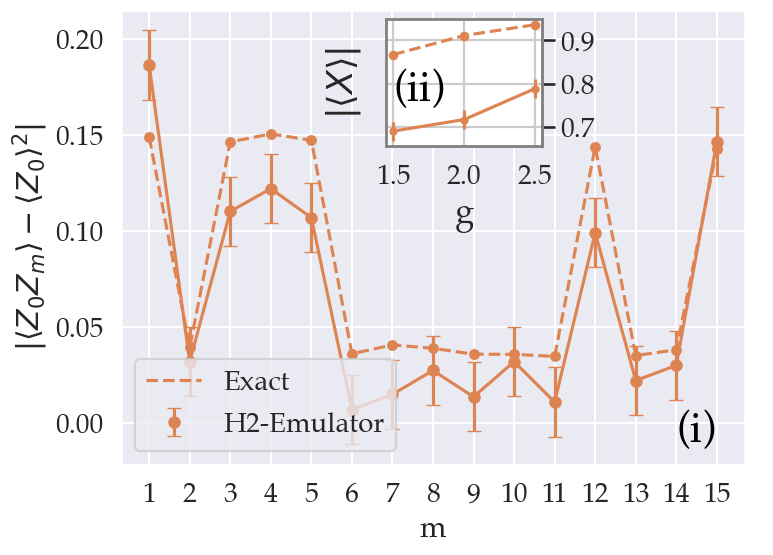

In [2875]:
"""
    Correlation Functions!
"""
sns.set_theme(
    style="darkgrid",  # 'darkgrid', 'white', 'ticks'
    context="talk",     # 'paper', 'talk', 'poster'
    font_scale=1.2,
    font="Palatino"
)
palette = sns.color_palette("deep")
plt.figure(figsize=(8, 6))

s = 40

#plt.errorbar(range(1, len(corrs15)+1), corrs15, yerr=np.array([[0.02, 0.02] for i in range(len(corrs3))]).T, label='g=1.5', color=palette[2])
#plt.scatter(range(1, len(corrs15)+1), corrs15, color=palette[2], s=s)
plt.errorbar(range(1, len(corrs2)+1), corrs2, yerr=np.array([[0.018, 0.018] for i in range(len(corrs2))]).T, 
             label='H2-Emulator', color=palette[1], fmt='o', capsize=5, markersize=8)
plt.plot(range(1, len(corrs2)+1), corrs2, color=palette[1])
#plt.errorbar(range(1, len(corrs3)+1), corrs3, yerr=np.array([[0.02, 0.02] for i in range(len(corrs3))]).T, label='g=3', color=palette[3])
#plt.scatter(range(1, len(corrs3)+1), corrs3, color=palette[3], s=s)
plt.xticks(range(1, len(corrs3)+1))

#plt.plot(range(1, len(corrs15)+1), corrs_exact_g15, ls='--', color=palette[2])
#plt.scatter(range(1, len(corrs15)+1), corrs_exact_g15,color=palette[2], s=s)
plt.plot(range(1, len(corrs2)+1), corrs_exact_g2, ls='--', color=palette[1], label='Exact')
plt.scatter(range(1, len(corrs2)+1), corrs_exact_g2,color=palette[1], s=s)
#plt.plot(range(1, len(corrs3)+1), corrs_exact_g3, ls='--', color=palette[3])
#plt.scatter(range(1, len(corrs3)+1), corrs_exact_g3,color=palette[3], s=s)


plt.xlabel('m')
plt.ylabel(r'$| \langle Z_0 Z_m \rangle - \langle Z_0\rangle^2|$')
plt.legend(prop={'size':20}, loc= 'lower left')
plt.annotate('(i)', (14, -0.01), color='black', size=30)

#plt.yscale('log')
# === Inset axes ===
with sns.axes_style("whitegrid"): 
    sns.set_theme(
        style="whitegrid",  # 'darkgrid', 'white', 'ticks'
        context="talk",     # 'paper', 'talk', 'poster'
        font_scale=1.2,
        font="Palatino"
    )
    
    ax_inset = inset_axes(
        plt.gca(),
        width="25%", height="28%",
        loc="upper center",
        bbox_to_anchor=(0.05, -0.02, 1, 1),  # (x0, y0, width, height)
        bbox_transform=plt.gca().transAxes,
        borderpad=0
    )
    ax_inset.scatter([1.5, 2, 2.5], [0.6907, 0.7174, 0.7889], color=palette[1], s=20)
    ax_inset.errorbar([1.5, 2, 2.5], [0.6907, 0.7174, 0.7889], yerr=np.array([ [0.0216, 0.0216] for i in range(1)]).T, color=palette[1])
    
    ax_inset.scatter([1.5, 2, 2.5], [0.867, 0.911, 0.936], color=palette[1], s=30)
    ax_inset.plot([1.5, 2, 2.5], [0.867, 0.911, 0.936], color=palette[1], ls='--')
    
    ax_inset.set_xlabel('g', size=25)
    ax_inset.set_ylabel(r'$|\langle X \rangle|$', size=25)
    ax_inset.set_yticklabels([])
    plt.annotate('(ii)', (1.5, 0.76), color='black', size=30)
    
    # Create a second y-axis
    y2 = ax_inset.twinx()
    y2.set_ylim(ax_inset.get_ylim())
    ax_inset.set_xticks([1.5, 2, 2.5])
    
    for side in ["top", "right", "bottom", "left"]:
        ax_inset.spines[side].set_visible(True)   # force all spines on
        ax_inset.spines[side].set_edgecolor("gray")
        ax_inset.spines[side].set_linewidth(2)


plt.tight_layout()
plt.savefig('../figs/correlation_funcs.pdf')
plt.savefig('../figs/correlation_funcs.png')
